<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/CNN_by_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train_class), (x_test, y_test_class)=keras.datasets.fashion_mnist.load_data()


x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = keras.utils.to_categorical(y_train_class, num_classes)
y_test = keras.utils.to_categorical(y_test_class, num_classes)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
model = keras.Sequential(
[keras.Input(shape=input_shape),
  layers.Conv2D(64, kernel_size=(7, 7), activation="relu", padding="same"),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
  layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
  layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(64, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation="softmax")])

In [3]:
batch_size = 4096
epochs = 25
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs, validation_split=0.1)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.2069 - loss: 2.1379 - val_accuracy: 0.6518 - val_loss: 1.1915
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 454ms/step - accuracy: 0.5043 - loss: 1.4174 - val_accuracy: 0.7375 - val_loss: 0.7816
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 453ms/step - accuracy: 0.6335 - loss: 1.0754 - val_accuracy: 0.7562 - val_loss: 0.6483
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 455ms/step - accuracy: 0.6843 - loss: 0.9065 - val_accuracy: 0.8100 - val_loss: 0.5685
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 460ms/step - accuracy: 0.7340 - loss: 0.7803 - val_accuracy: 0.8297 - val_loss: 0.5153
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 466ms/step - accuracy: 0.7633 - loss: 0.6891 - val_accuracy: 0.8367 - val_loss: 0.4567
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - accuracy: 0.7858 - loss: 0.6211 - val_accuracy: 0.8453 - val_loss: 0.4364
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 490ms/step - accuracy: 0.7996 - loss: 0.5924 - val_accuracy:

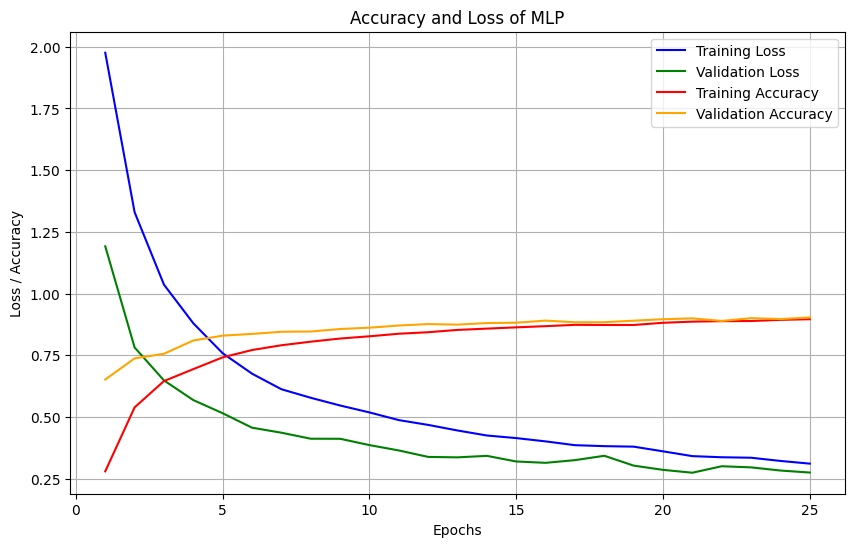

In [4]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 손실 그래프
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'g-', label='Validation Loss')

# 정확도 그래프
plt.plot(epochs, accuracy, 'r-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation Accuracy')

# 그래프 설정
plt.title('Accuracy and Loss of MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.grid(True)
plt.show()
